<a href="https://colab.research.google.com/github/GETHUB55/SkillTreePython-DeepLearning/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Segmentation
---

![](https://github.com/yebiny/Image-Segmentation-TF2/blob/main/imgs/seg_type.png?raw=true)


![](https://github.com/yebiny/Image-Segmentation-TF2/blob/main/imgs/seg_model.png?raw=true)

## 모델: UNet
---

![]( https://github.com/yebiny/Image-Segmentation-TF2/blob/main/imgs/unet2.png?raw=true)

### 모델 생성

```
! git clone https://github.com/karolzak/keras-unet
```

In [1]:
! git clone https://github.com/karolzak/keras-unet

Cloning into 'keras-unet'...
remote: Enumerating objects: 1234, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 1234 (delta 44), reused 75 (delta 34), pack-reused 1136
Receiving objects: 100% (1234/1234), 31.94 MiB | 11.24 MiB/s, done.
Resolving deltas: 100% (372/372), done.


In [2]:
import sys
sys.path.append('/content/keras-unet/keras_unet/models')
sys.path.append('/content/keras-unet/')

In [3]:
from custom_unet import *

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [4]:
model = custom_unet(input_shape=(512,512,3))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 16  432         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

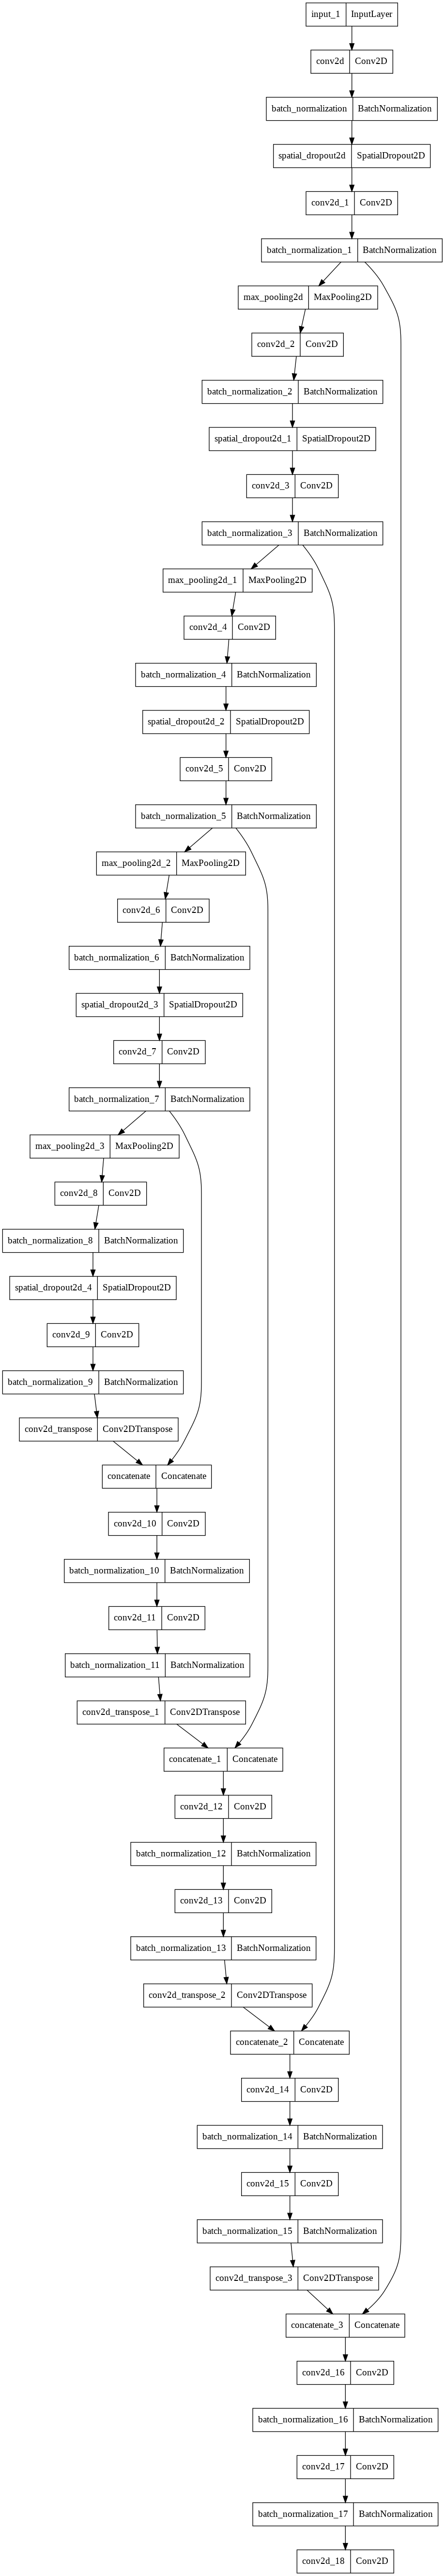

In [5]:
from tensorflow.keras import utils
utils.plot_model(model)


## 데이터셋: Whale-tails
---

In [8]:
import glob
img_path = sorted(glob.glob('/content/keras-unet/input/whales/*.jpg')) #*모든파일
mask_path = sorted(glob.glob('/content/keras-unet/input/whales/*.png')) #정답을 마스크라함.
print(img_path[0])
print(mask_path[0])

/content/keras-unet/input/whales/0000e88ab.jpg
/content/keras-unet/input/whales/0000e88ab.png


In [9]:
import matplotlib.pyplot as plt

(400, 400, 3)
(400, 400, 3)


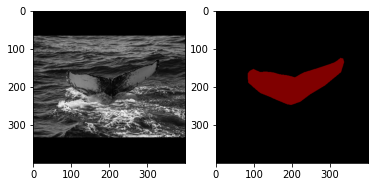

In [15]:
img_arr = plt.imread(img_path[0]) #넘파이 바꾸는게 이미지리드
print(img_arr.shape)
plt.subplot(121)
plt.imshow(img_arr)

mask_arr = plt.imread(mask_path[0])
print(mask_arr.shape)
plt.subplot(122)
plt.imshow(mask_arr)

In [27]:
import numpy as np

img_ds = []
mask_ds = []
for img, mask in zip(img_path, mask_path):  #폴더안의 모든경로를 배열로 바꿈
  img_arr = plt.imread(img)
  mask_arr = plt.imread(mask)
  img_ds.append(img_arr)
  mask_ds.append(mask_arr)
img_ds = np.array(img_ds)
mask_ds = np.array(mask_ds) 
mask_ds = np.expand_dims(mask_ds[:,:,:,0],3)
img_ds.shape, mask_ds.shape

((148, 400, 400, 3), (148, 400, 400, 1))

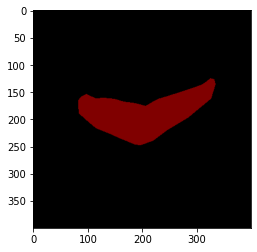

In [23]:
plt.imshow(mask_ds[0])

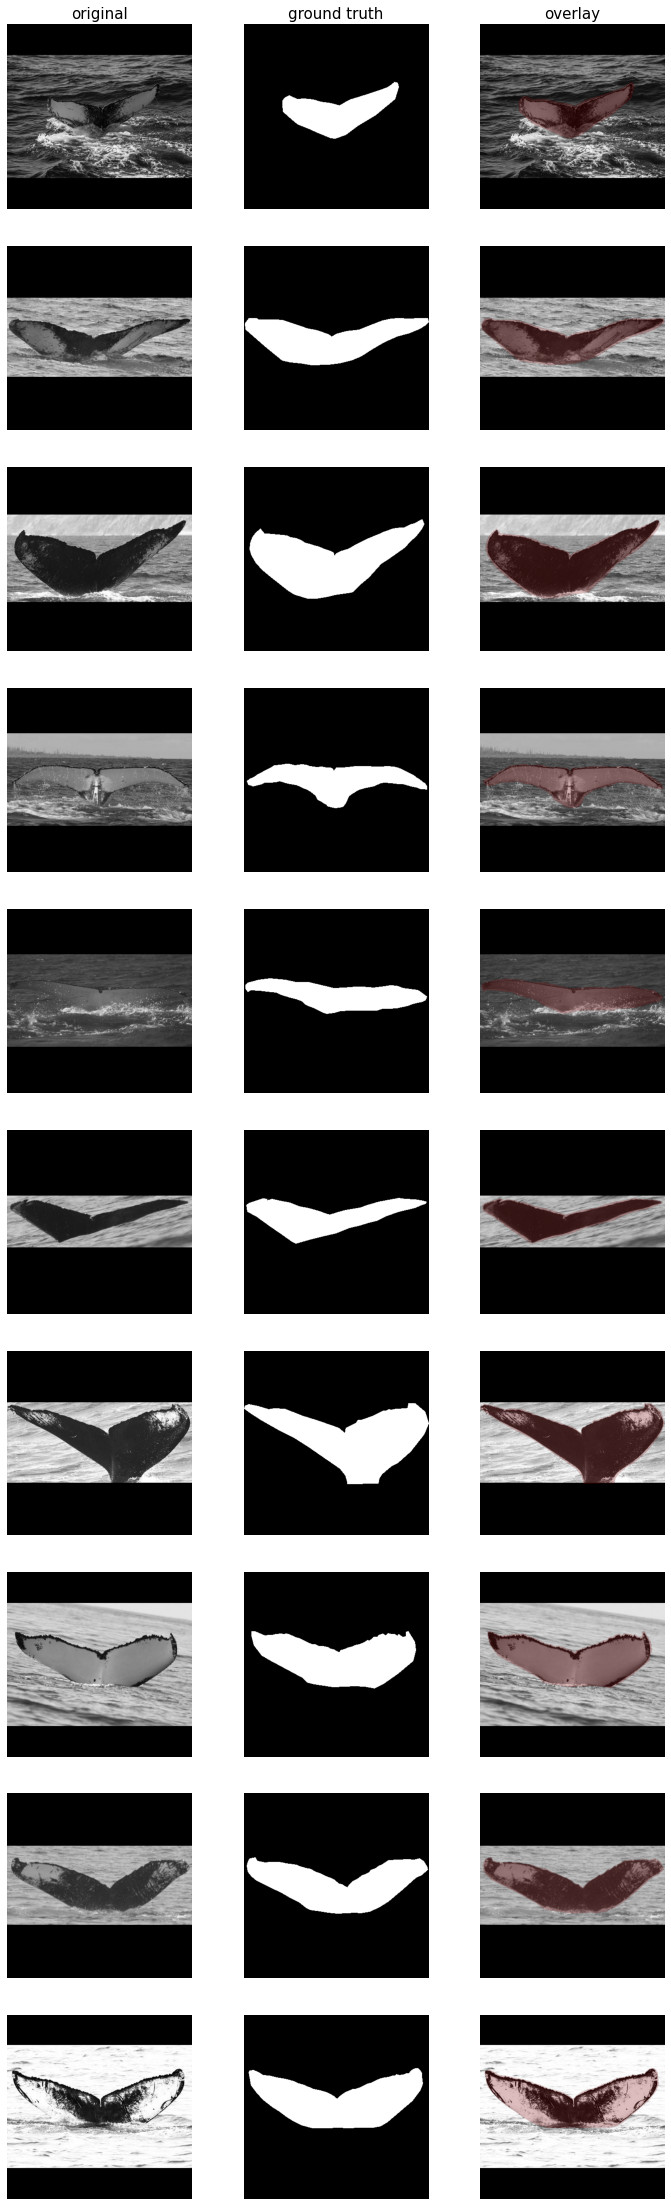

In [28]:
from keras_unet.utils import plot_imgs
plot_imgs(img_ds, mask_ds)

In [31]:
#전처리 정규화
img_ds = img_ds/255.0


In [ ]:
#모델 생성
model = custom_unet(input_shape=(400,400,3))
model.summary()

In [33]:
model.compile(loss ='binary_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])

In [ ]:
model.fit(img_ds, mask_ds,epochs=30) #(인풋,아웃풋)


In [37]:
preds = model.predict(img_ds)
print(preds.shape)

(148, 400, 400, 1)


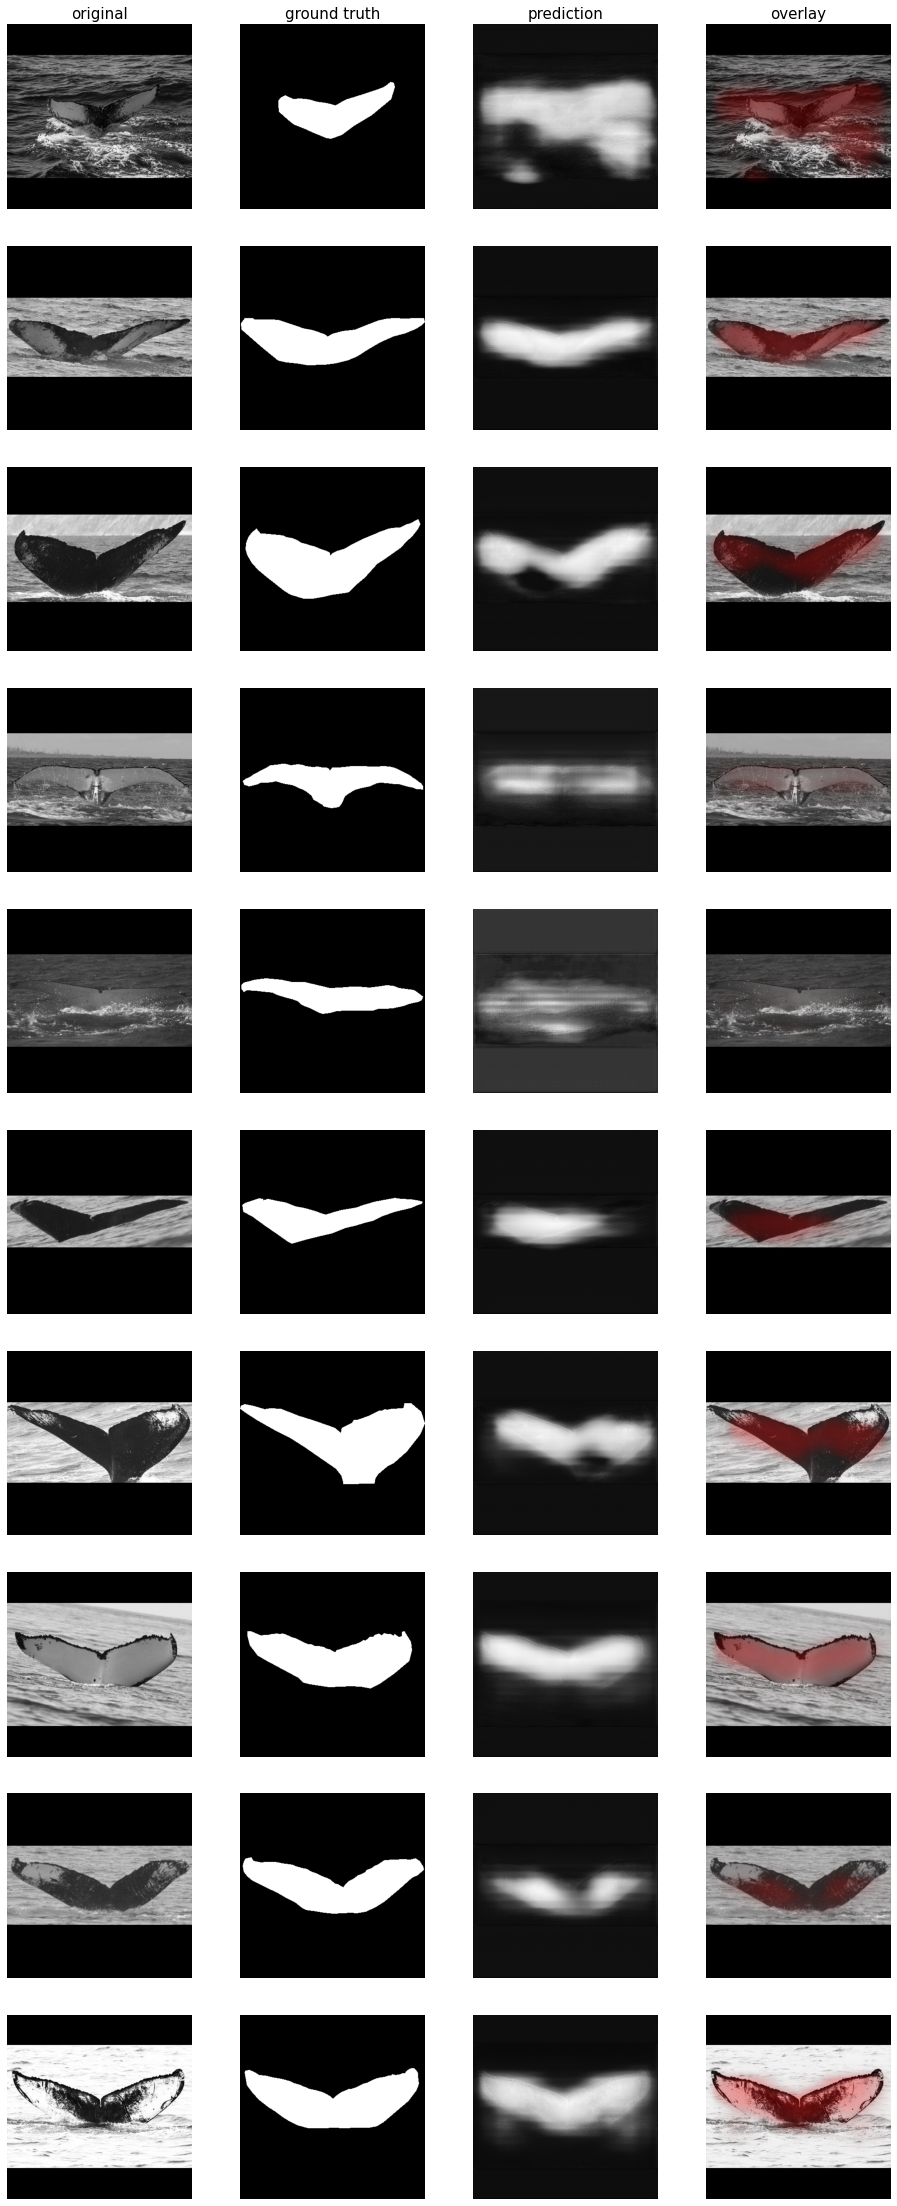

In [38]:
plot_imgs(img_ds,mask_ds,pred_imgs=preds)

## 데이터셋: Crowd Instance-level Human Parsing (CIHP)
---

(https://arxiv.org/abs/1811.12596)

* 38,280개의 다양한 인간 이미지
![](https://github.com/yebiny/Image-Segmentation-TF2/blob/main/imgs/chip.png?raw=true)



```
! gdown https://drive.google.com/uc?id=1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz
! unzip -q instance-level-human-parsing.zip
```

In [39]:
! gdown https://drive.google.com/uc?id=1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz
! unzip -q instance-level-human-parsing.zip

Downloading...
From: https://drive.google.com/uc?id=1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz
To: /content/instance-level-human-parsing.zip
100% 2.91G/2.91G [01:11<00:00, 40.7MB/s]
replace ICCV15_fashion_dataset(ATR)/humanparsing/JPEGImages/2500_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ICCV15_fashion_dataset(ATR)/humanparsing/JPEGImages/2500_10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
! ls /content/instance-level_human_parsing/instance-level_human_parsing/Training/Images/

In [42]:
import glob
img_path = sorted(glob.glob('/content/instance-level_human_parsing/instance-level_human_parsing/Training/Images/*jpg')) #*모든파일
mask_path = sorted(glob.glob('/content/instance-level_human_parsing/instance-level_human_parsing/Training/Category_ids/*.png')) #정답을 마스크라함.
print((len(img_path), img_path[0]))
print((len(mask_path), mask_path[0]))

(28280, '/content/instance-level_human_parsing/instance-level_human_parsing/Training/Images/0000006.jpg')
(28280, '/content/instance-level_human_parsing/instance-level_human_parsing/Training/Category_ids/0000006.png')


(500, 335, 3)
(500, 335)


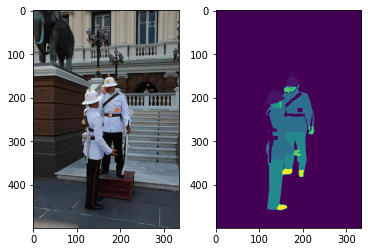

In [43]:

img_arr = plt.imread(img_path[0]) #넘파이 바꾸는게 이미지리드
print(img_arr.shape)
plt.subplot(121)
plt.imshow(img_arr)

mask_arr = plt.imread(mask_path[0])
print(mask_arr.shape)
plt.subplot(122)
plt.imshow(mask_arr)

In [54]:
import numpy as np
from PIL import Image

img_ds = []
mask_ds = []
for img, mask in zip(img_path[:2000], mask_path[:2000]):  #폴더안의 모든경로를 배열로 바꿈
  img_arr = np.array(Image.open(img).resize((256,256)))
  mask_arr = np.array(Image.open(mask).resize((256,256)))
  img_ds.append(img_arr)
  mask_ds.append(mask_arr)
img_ds = np.array(img_ds)
mask_ds = np.array(mask_ds) 
mask_ds = np.expand_dims(mask_ds,3)
img_ds.shape, mask_ds.shape


((2000, 256, 256, 3), (2000, 256, 256, 1))

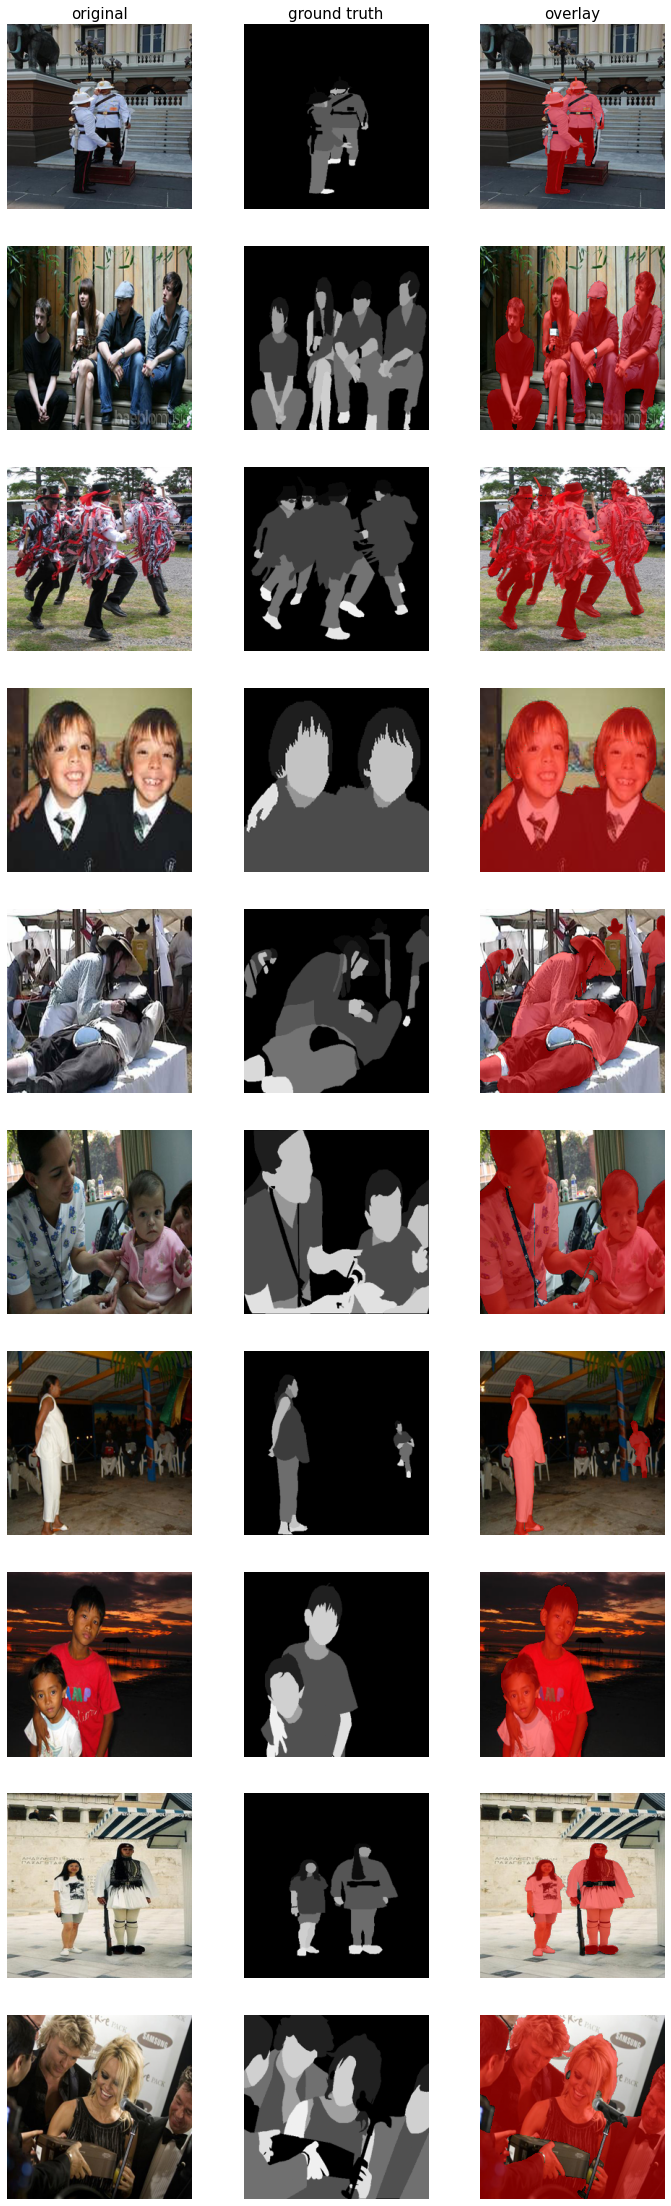

In [55]:
from keras_unet.utils import plot_imgs
plot_imgs(img_ds, mask_ds)

In [56]:
np.max(img_ds),np.max(mask_ds)

(255, 22)

In [57]:
imgs_ds=img_ds/255.0

In [60]:
#모델 생성
model = custom_unet(input_shape=(256,256,3),num_classes=23)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_57 (Conv2D)             (None, 256, 256, 16  432         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_54 (BatchN  (None, 256, 256, 16  64         ['conv2d_57[0][0]']              
 ormalization)                  )                                                           

In [61]:
model.compile(loss ='sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])

In [62]:
model.fit(img_ds, mask_ds,epochs=30) #(인풋,아웃풋)


Epoch 1/30
63/63 [==============================] - 30s 367ms/step - loss: 2.9490 - acc: 0.2714
Epoch 2/30
63/63 [==============================] - 21s 334ms/step - loss: 2.3156 - acc: 0.5201
Epoch 3/30
63/63 [==============================] - 22s 342ms/step - loss: 1.9015 - acc: 0.5824
Epoch 4/30
63/63 [==============================] - 22s 343ms/step - loss: 1.6678 - acc: 0.5971
Epoch 5/30
63/63 [==============================] - 21s 339ms/step - loss: 1.5004 - acc: 0.6072
Epoch 6/30
63/63 [==============================] - 21s 339ms/step - loss: 1.3893 - acc: 0.6147
Epoch 7/30
63/63 [==============================] - 21s 341ms/step - loss: 1.3369 - acc: 0.6178
Epoch 8/30
63/63 [==============================] - 22s 341ms/step - loss: 1.2962 - acc: 0.6219
Epoch 9/30
63/63 [==============================] - 21s 340ms/step - loss: 1.2620 - acc: 0.6295
Epoch 10/30
63/63 [==============================] - 21s 340ms/step - loss: 1.2397 - acc: 0.6323
Epoch 11/30
63/63 [====================

In [63]:
preds = model.predict(img_ds[:50])
print(preds.shape,mask_ds[:50].shape)

(50, 256, 256, 23) (50, 256, 256, 1)


In [65]:
preds_argmax = np.argmax(preds, 3)
print(preds_argmax.shape)

(50, 256, 256)


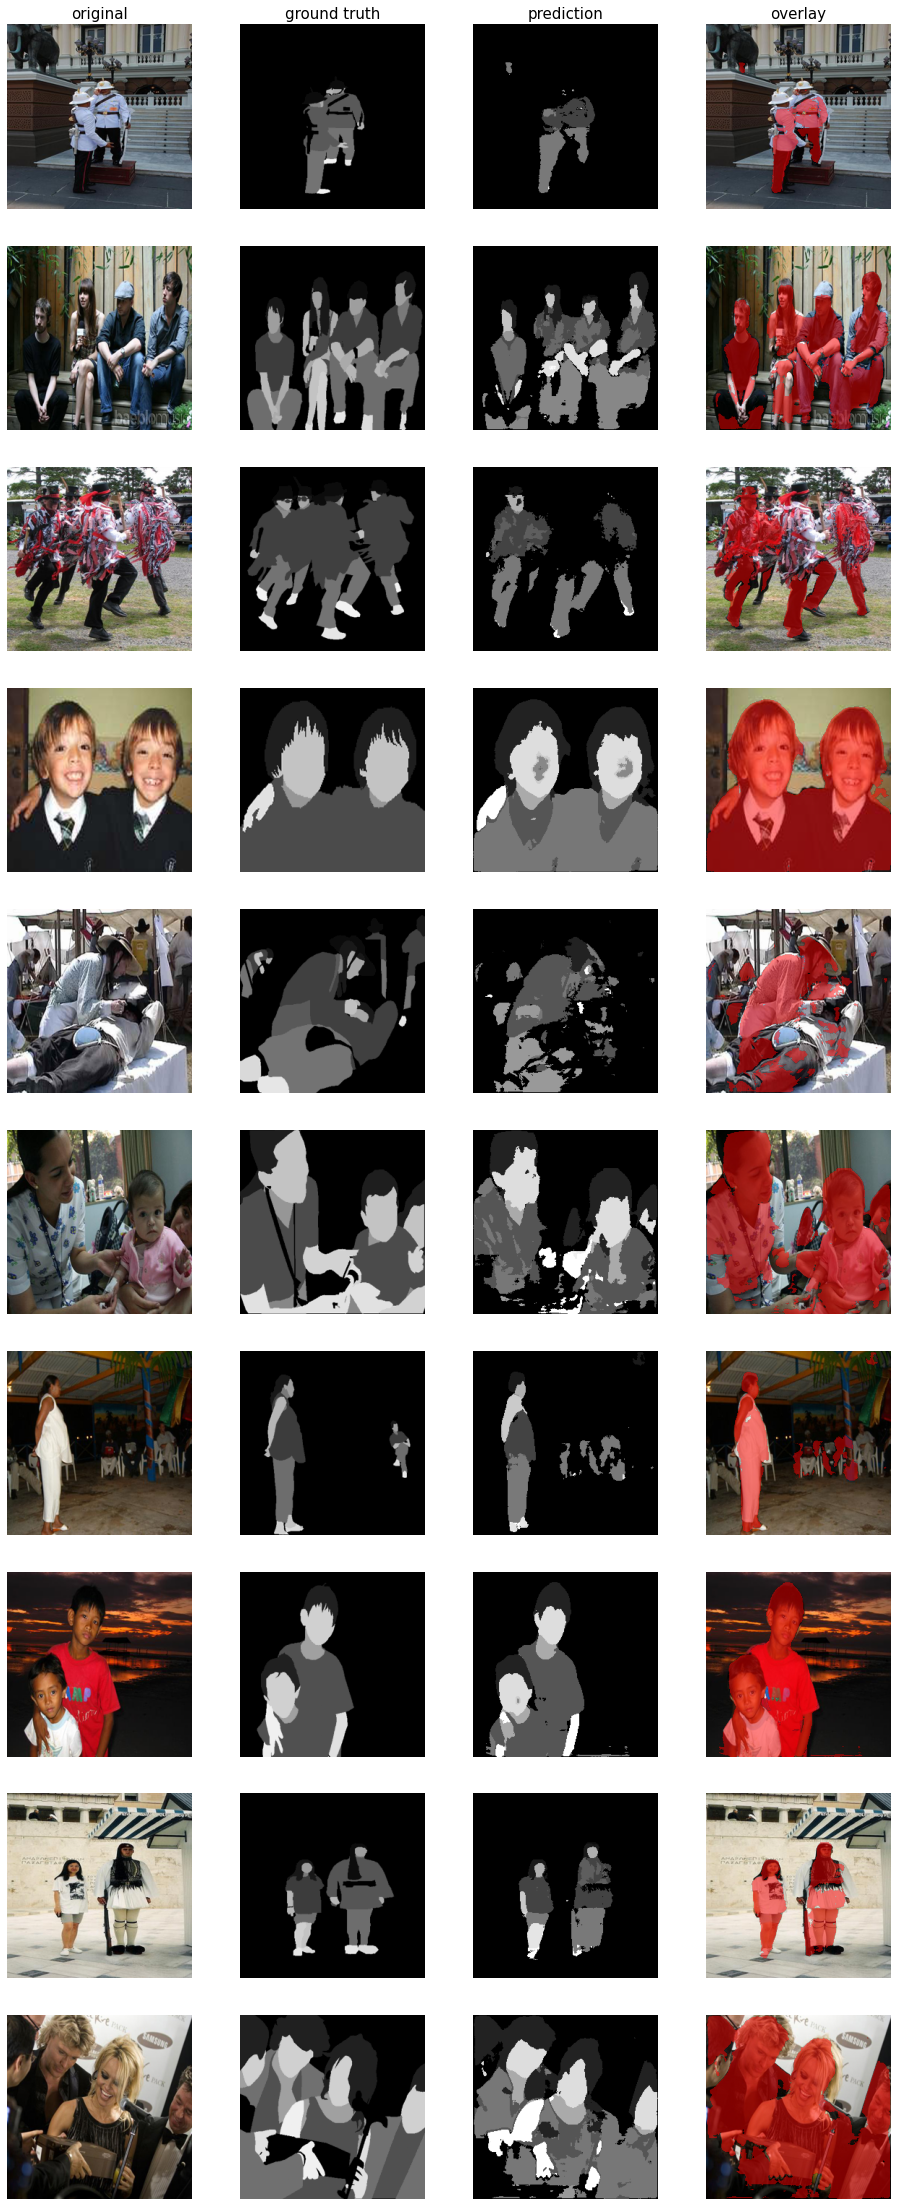

In [67]:
plot_imgs(img_ds,mask_ds,pred_imgs=preds_argmax)

## 데이터셋: Oxford-IIIT Pets 데이터셋
---
![](https://github.com/yebiny/Image-Segmentation-TF2/blob/main/imgs/oxford-pet.jpeg?raw=true)


```
!curl -O  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!curl -O  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz
```